In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline


In [13]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df=pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [14]:
df.columns=['Recency','Frequency','Monetary','Time','Donated']
df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [15]:
x=df.drop('Donated',axis=1)
y=df['Donated']

In [16]:
target=LabelEncoder()
y=target.fit_transform(y)

In [17]:
clf=Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('knn',KNeighborsClassifier(n_neighbors=5))])


In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [20]:
accuracy=clf.score(X_test,y_test)
print('Accuracy:',accuracy)

Accuracy: 0.7466666666666667


In [21]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',cm)

Confusion Matrix: [[103  10]
 [ 28   9]]


-precision:how many predicted positive are actually positive
-Recall : how many actual positve are correctly predicted 
-f1 score:balance score of precision and recall


In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('Accuracy:',accuracy)
print('Precision:',precision)
print('recall:',recall)
print('F1:',f1)

Accuracy: 0.7466666666666667
Accuracy: 0.7466666666666667
Precision: 0.47368421052631576
recall: 0.24324324324324326
F1: 0.32142857142857145


<Axes: >

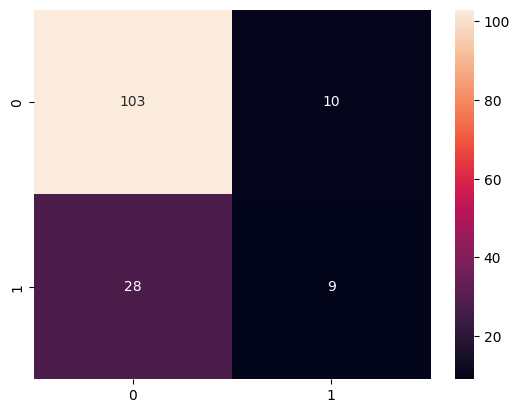

In [26]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cbar=True)